Czy przybliżenie zdjęcia jest takie samo? (Ilość pixeli na cm^2)

Rozwiązanie: Chunker musi przyjmować rozdzielczość "wejsciową" (Dobrana w wyniku optymalizacji) oraz "wyjściową" (U nas 96x96)

# WAZNE !!!!!


Z całeg otego kodu istotna jest tylko jedna funkcja, to co tam jest pod tym nie ma znaczenia! :D




def cropper  
                              Input:
                              
                              OBOWIAZKOWY
               photo_abs_path     <-- path do zdjęcia
               crop_dim           <-- Dim na jaki ma być krojone
               
               
               
                               DODATKOWY, bez niego leci dla całego zdjęcia
               one_row = True     <-- Aktywuje to, że ściagane są obrazu z jednego row'a    
               start_row = 2      <-- Wybór row'a 
                            
                            
                            
                            output:
                images_list   <-- Lista zawierająca pocięte zdjęcia
                place_list    <-- Lista zawierajaca pozycję tego zdjęcia "w układzie zdjęć"
                
                




In [1]:
import cv2
from PIL import Image
import numpy as np
import pandas as pd


def crop_part(photo_abs_path, crop_dim=(0,0),crop_start_x = 0, crop_start_y=0):
    ''' Crop part of image with given dim, from some starting point for given x and y
    INPUT
    photo_abs_path = photo absolute path
    crop_dim = dim for output image
    crop_start_x = x cord for cut start
    crop_start_y = y cord for cut start
    
    OUTPUT
    cropped_image - array with image
    out_of_image - 0 if its ok,  1 if cut is on right border ,  2 if is too high
    '''
    image_to_crop = cv2.imread(image_path)
    height, width, channel = image_to_crop.shape
    
    if height < crop_dim[1]+crop_start_y and width < crop_dim[0]+crop_start_x:
        cropped_image = image_to_crop[height-crop_dim[1]:height,width-crop_dim[0]:width,:]
        out_of_image = 3
      
    elif width < crop_dim[0]+crop_start_x:
        cropped_image = image_to_crop[crop_start_y:crop_start_y+crop_dim[0],width-crop_dim[0]:width,:]
        out_of_image = 1
        
    elif height < crop_dim[1]+crop_start_y:
        cropped_image = image_to_crop[height-crop_dim[1]:height,crop_start_x:crop_start_x+crop_dim[1],:]
        out_of_image = 2

    else:
        cropped_image = image_to_crop[crop_start_y:crop_start_y+crop_dim[0],crop_start_x:crop_start_x+crop_dim[1],:]
        out_of_image = 0
    return cropped_image,out_of_image



def cropper(photo_abs_path, crop_dim=(400,400),start_row=0,one_row=False):
    image_to_crop = cv2.imread(image_path) 
    height , width, channel = image_to_crop.shape
    x_crop = 0
    y_crop = 0
    stop_check_2 = 0
    place_list = []
    images_list = []
    stop_value = 0
    images_dataframe = pd.DataFrame() 

  
    for i in range(start_row,int(np.ceil(height/crop_dim[1]))):
        #Iterating by height
        
        if one_row == True:
            y_crop = crop_dim[1]*start_row
            if stop_value == 1:
                return images_list, place_list 
            else:
                stop_value = 1
            
            
        for j in range(0,int(np.ceil(width/crop_dim[0]))+1):
            #Iterating by width

        
            cropped_image,out = crop_part(photo_abs_path= image_path, 
                                        crop_dim=crop_dim,
                                        crop_start_x = x_crop,   
                                        crop_start_y= y_crop )

            
            images_list.append(cropped_image)
            place_list.append([i,j])
            x_crop += crop_dim[0]

            if out == 1:
                x_crop = 0
                y_crop += crop_dim[1]

                break
            
            if stop_check_2 != 1: 
                if out == 2:
                    x_crop = crop_dim[1]
                    stop_check_2 = 1
                    
            
                    
    return images_list, place_list

In [2]:
import matplotlib.pyplot as plt

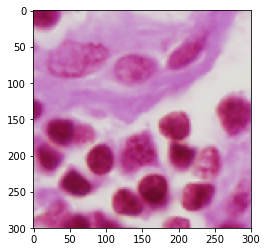

In [59]:
image_path = r"C:\Users\lancernik\1GitProjects\Chunker\data\cmuj\pointrLN+.tif"

img,out = crop_part(photo_abs_path=image_path, 
            crop_dim=(300,300),
            crop_start_x = 4,   
            crop_start_y= 50 )


plt.imshow(img)
plt.show()

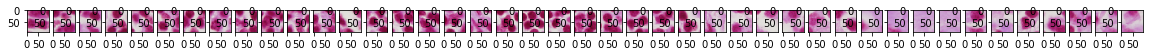

In [61]:
images_list,place_list = cropper(image_path,crop_dim=(96,96),one_row = True, start_row = 4)


plt.figure(figsize=(20,20))
for i in range(1, (len(images_list)+1)):
    plt.subplot(1, len(images_list), i)
    plt.imshow(images_list[i-1])


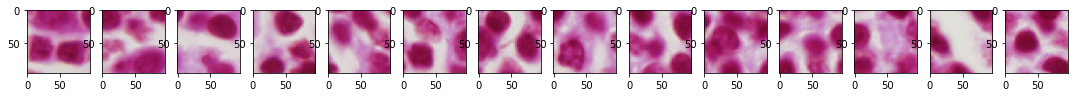

In [62]:

plt.figure(figsize=(20,20))
for i in range(1, 15):
    plt.subplot(1, 15, i)
    plt.imshow(images_list[i-1])
    


In [64]:
images_list,place_list = cropper(image_path,crop_dim=(300,300))


11 14 154


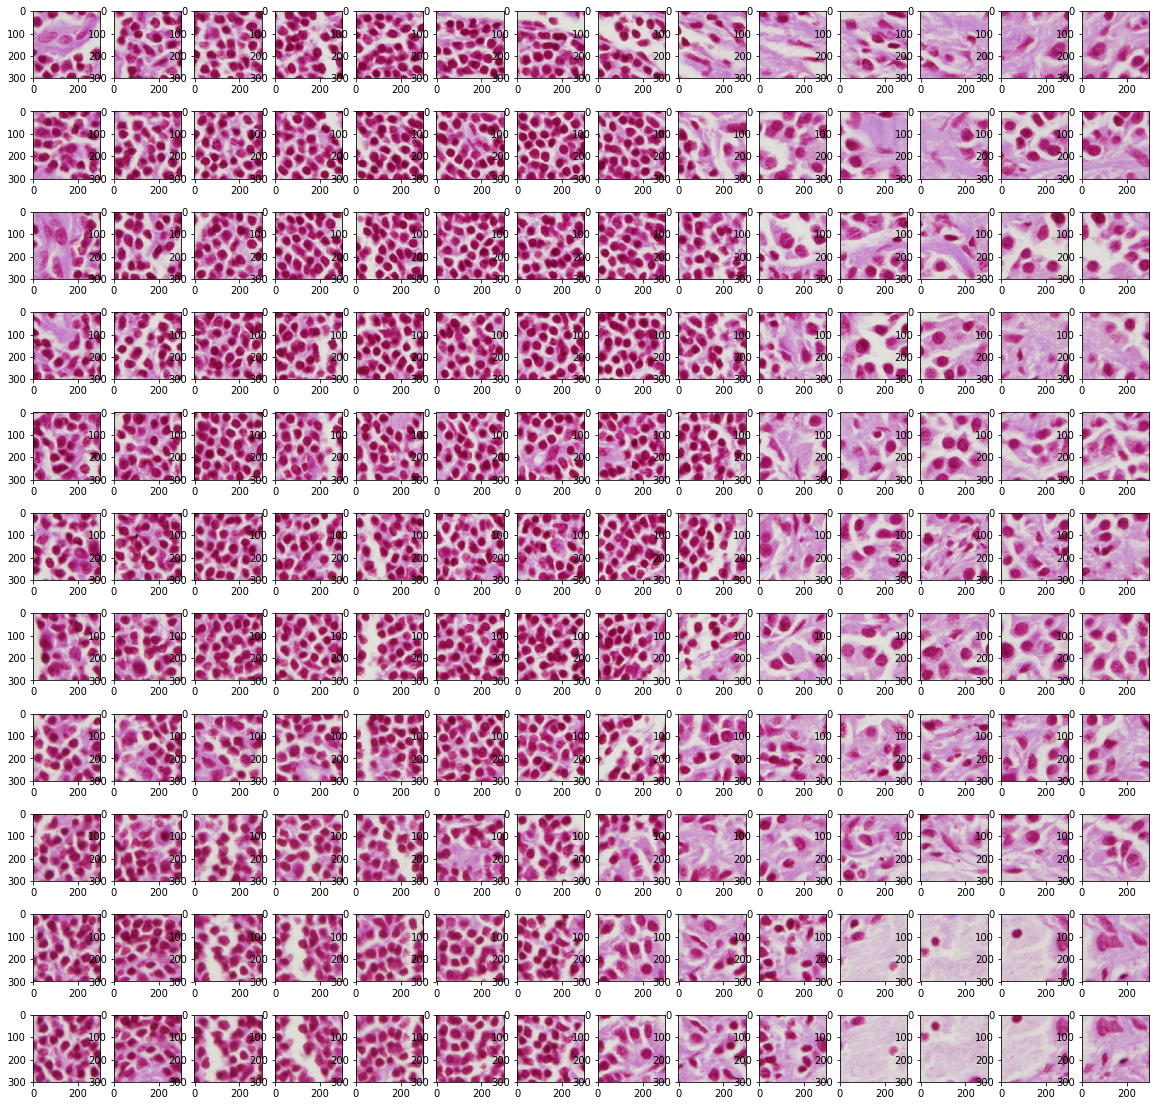

In [65]:
images_list,place_list = cropper(image_path,crop_dim=(300,300))

plot_rows = place_list[-1][0]+1
plot_columns = place_list[-1][1]
PlotCount = plot_rows*plot_columns
print(plot_rows,plot_columns,PlotCount)



plt.figure(figsize=(20,20))
for i in range(1, PlotCount+1):
    
    plt.subplot(plot_rows, plot_columns, i)
    plt.imshow(images_list[i-1])

7 9 63


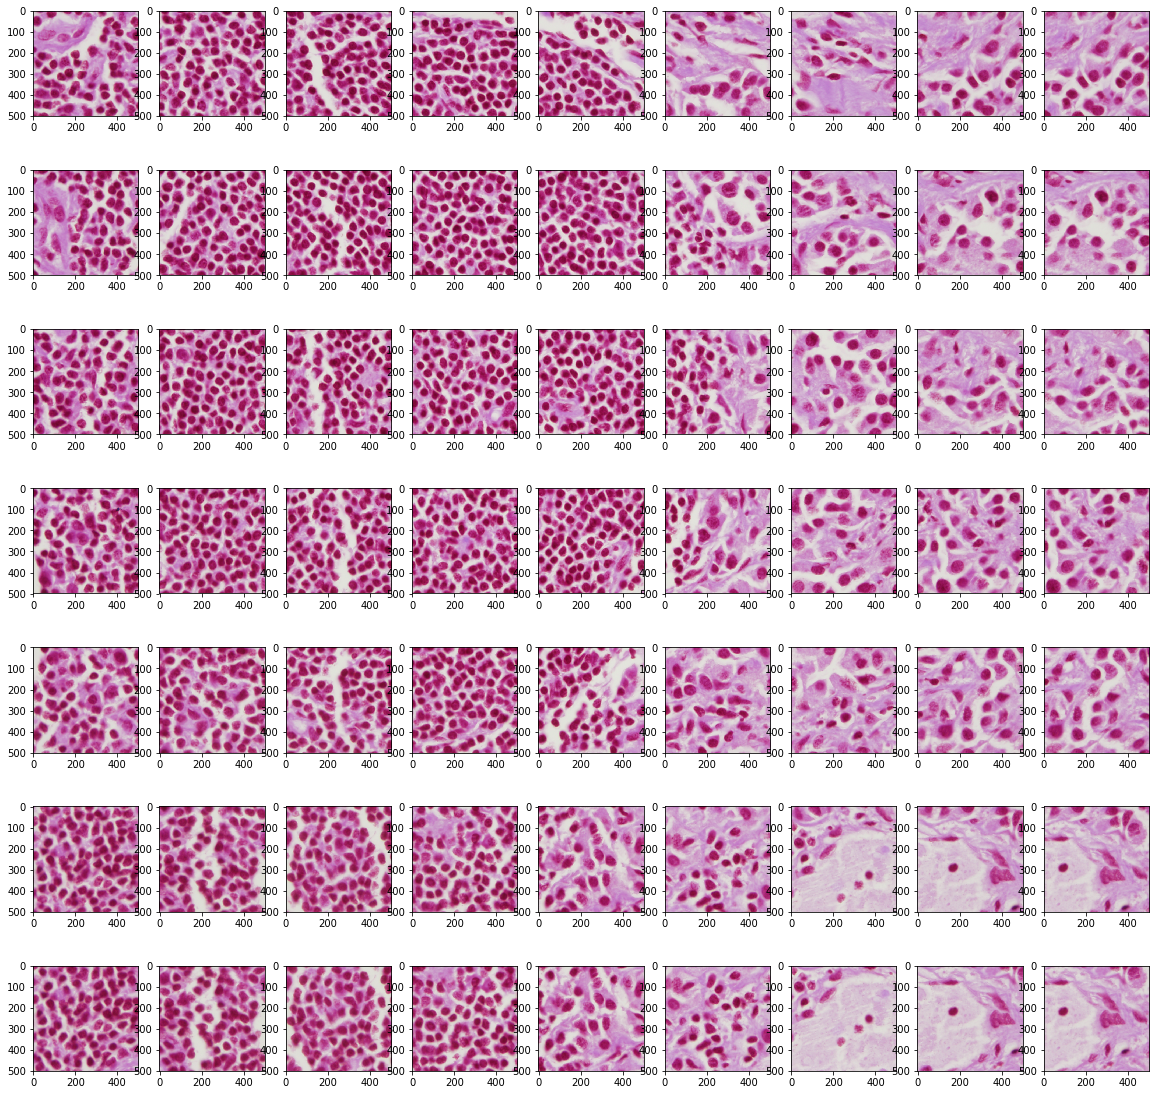

In [66]:
images_list,place_list = cropper(image_path,crop_dim=(500,500))

plot_rows = place_list[-1][0]+1
plot_columns = place_list[-1][1]
PlotCount = plot_rows*plot_columns
print(plot_rows,plot_columns,PlotCount)



plt.figure(figsize=(20,20))
for i in range(1, PlotCount+1):
    
    plt.subplot(plot_rows, plot_columns, i)
    plt.imshow(images_list[i-1])

4 6 24


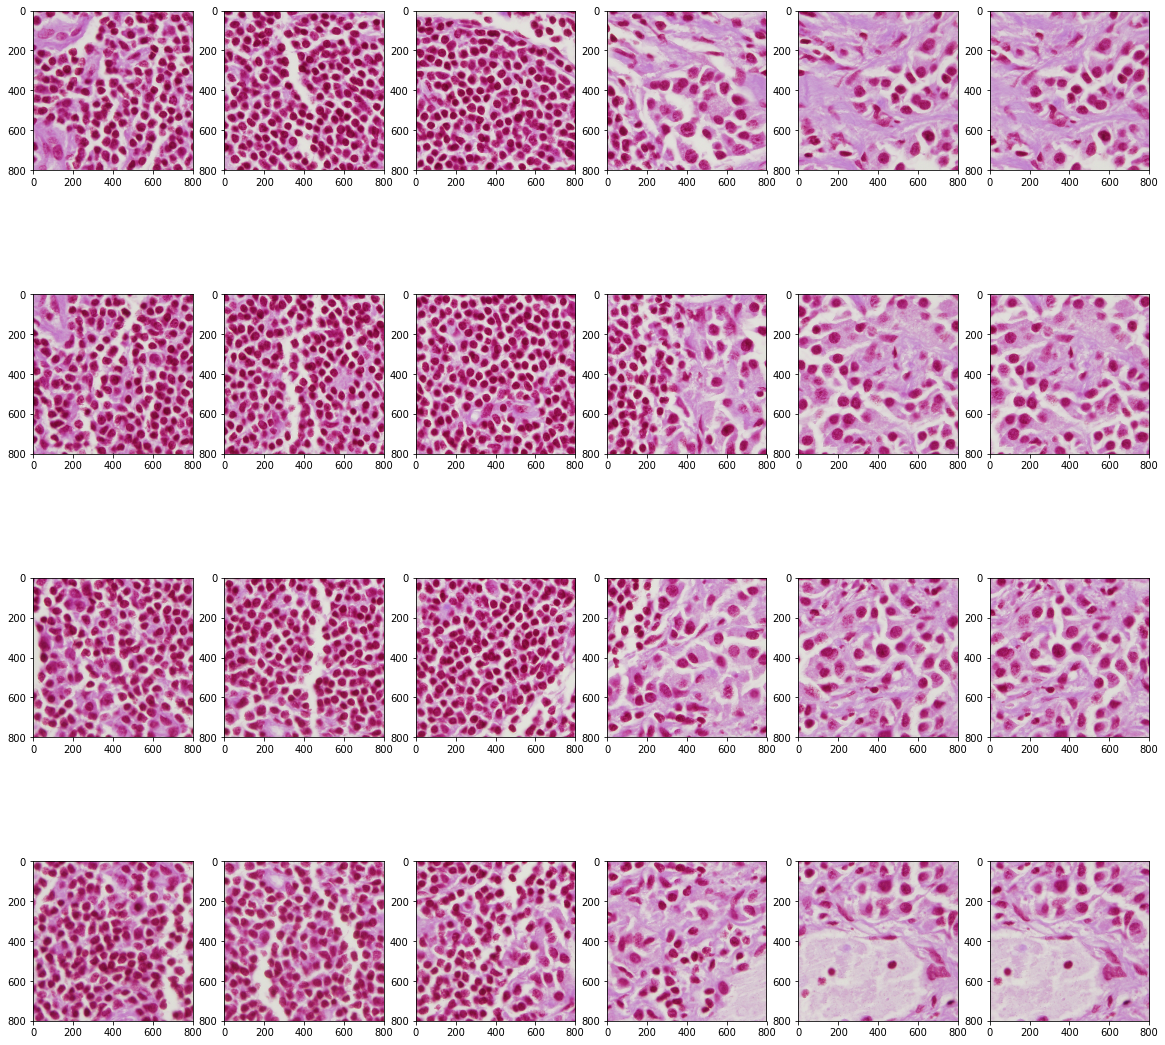

In [67]:
images_list,place_list = cropper(image_path,crop_dim=(800,800))

plot_rows = place_list[-1][0]+1
plot_columns = place_list[-1][1]
PlotCount = plot_rows*plot_columns
print(plot_rows,plot_columns,PlotCount)



plt.figure(figsize=(20,20))
for i in range(1, PlotCount+1):
    
    plt.subplot(plot_rows, plot_columns, i)
    plt.imshow(images_list[i-1])

In [8]:
images_list,place_list = cropper(image_path,crop_dim=(500,500),one_row = True, start_row = 2)
    

In [9]:
place_list

[[2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8]]

In [10]:
images_list

[array([[[153,  95, 168],
         [150,  91, 166],
         [148,  88, 162],
         ...,
         [167, 128, 183],
         [167, 125, 182],
         [164, 123, 182]],
 
        [[154,  96, 169],
         [152,  93, 167],
         [151,  90, 163],
         ...,
         [167, 128, 183],
         [165, 127, 183],
         [162, 126, 183]],
 
        [[155,  99, 169],
         [153,  96, 167],
         [152,  95, 163],
         ...,
         [168, 129, 184],
         [166, 128, 184],
         [162, 127, 184]],
 
        ...,
 
        [[187, 173, 192],
         [186, 175, 192],
         [186, 178, 191],
         ...,
         [180, 131, 173],
         [181, 149, 179],
         [179, 157, 182]],
 
        [[187, 174, 192],
         [186, 176, 191],
         [185, 178, 190],
         ...,
         [182, 134, 173],
         [184, 154, 182],
         [181, 159, 184]],
 
        [[186, 171, 191],
         [185, 175, 191],
         [185, 179, 192],
         ...,
         [182, 133, 172],
  

In [11]:
img = Image.fromarray(images_list[2], 'RGB')
img.show()

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import os 
import cv2
import IPython
import imgaug as ia
from PIL import Image
from glob import glob 
import tensorflow as tf
#import tf_encrypted as tfe
import keras 
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization,GlobalAveragePooling2D
from keras.layers import LeakyReLU,Concatenate,GlobalMaxPooling2D
from keras.layers import Dense, Dropout, Flatten, Input,BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from keras.models import Model
from keras.callbacks import *
from keras import backend as K 
from keras.applications.nasnet import NASNetMobile, NASNetLarge, preprocess_input
from keras.losses import binary_crossentropy
from keras.optimizers import Adam,SGD
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
#import lime
#from lime import lime_image
from tqdm import tqdm
from skimage.segmentation import mark_boundaries
input_shape = (96, 96, 3) # Defining image size, can be different if any other model is given
output_shape = 1 # Output shape required in binary classification
learning_rate = 0.0001 # Hiperparameter to define speed of learning.

# learning_rate for cyclical_learning_rate if its provided
# learning_rate= 0.0000001

def create_model(): 
    ''' Function makes an object which contain model classifier 
        using Keras python library
        
         Parameters:
        -----------
         Function does not require any specific argument if 
         proper global variables are given.
         
         Returns:
       ------------ 
         Object that consist of model classifier to classify 
         the input data
    '''
    input_tensor = Input(shape=input_shape)
    base_model = NASNetMobile(include_top=False, input_tensor=input_tensor)
    x = base_model(input_tensor) 
    out1 = GlobalMaxPooling2D()(x)
    out2 = GlobalAveragePooling2D()(x)
    out3 = Flatten()(x)
    out = Concatenate(axis=-1)([out1, out2, out3]) 
    out = Dropout(.5)(out) 
    out = Dense(output_shape, activation='sigmoid')(out)
    model = Model(input_tensor, out)
    model.compile(optimizer = Adam(learning_rate), loss=binary_crossentropy, metrics=['acc'])
    # If you want to add cyclical learning rate is better to use SGD optimizer 
    #model.compile(optimizer=SGD(learning_rate), loss=binary_crossentropy,metrics =['acc'])
    return model 
                

model = create_model() # Creating Model

print(model.summary())

Using TensorFlow backend.
W1126 20:09:25.494178 13820 deprecation_wrapper.py:119] From E:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1126 20:09:25.508141 13820 deprecation_wrapper.py:119] From E:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1126 20:09:25.511133 13820 deprecation_wrapper.py:119] From E:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W1126 20:09:25.530082 13820 deprecation_wrapper.py:119] From E:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1126 20:09:25.531080 13820 deprecation_wrapper.py:119] From E:\Ana

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 96, 96, 3)    0                                            
__________________________________________________________________________________________________
NASNet (Model)                  (None, 3, 3, 1056)   4269716     input_1[0][0]                    
__________________________________________________________________________________________________
global_max_pooling2d_1 (GlobalM (None, 1056)         0           NASNet[1][0]                     
__________________________________________________________________________________________________
global_average_pooling2d_1 (Glo (None, 1056)         0           NASNet[1][0]                     
__________________________________________________________________________________________________
flatten_1 

In [16]:
model = tf.keras.models.load_model(r'C:\Users\lancernik\1GitProjects\Chunker\data\model_pierwszy_adam.h5')

W1126 20:11:27.559295 13820 deprecation.py:573] From E:\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py:507: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with distribution=normal is deprecated and will be removed in a future version.
Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`
W1126 20:11:27.564281 13820 deprecation.py:506] From E:\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [56]:
images_list,place_list = cropper(image_path,crop_dim=(1300,1300))

In [34]:
plot_rows = place_list[-1][0]+1
plot_columns = place_list[-1][1]
PlotCount = plot_rows*plot_columns
print(plot_rows,plot_columns,PlotCount)

plt.figure(figsize=(20,20))
for i in range(1, PlotCount+1):
    
    plt.subplot(plot_rows, plot_columns, i)
    plt.imshow(images_list[i-1])

4 5 20


'\nplt.figure(figsize=(20,20))\nfor i in range(1, PlotCount+1):\n    \n    plt.subplot(plot_rows, plot_columns, i)\n    plt.imshow(images_list[i-1])'

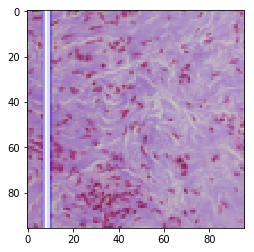

In [58]:
resized = cv2.resize(images_list[4], (96,96), interpolation = cv2.INTER_AREA)
plt.imshow(resized)

In [98]:
len(images_list)

7

6 7 42


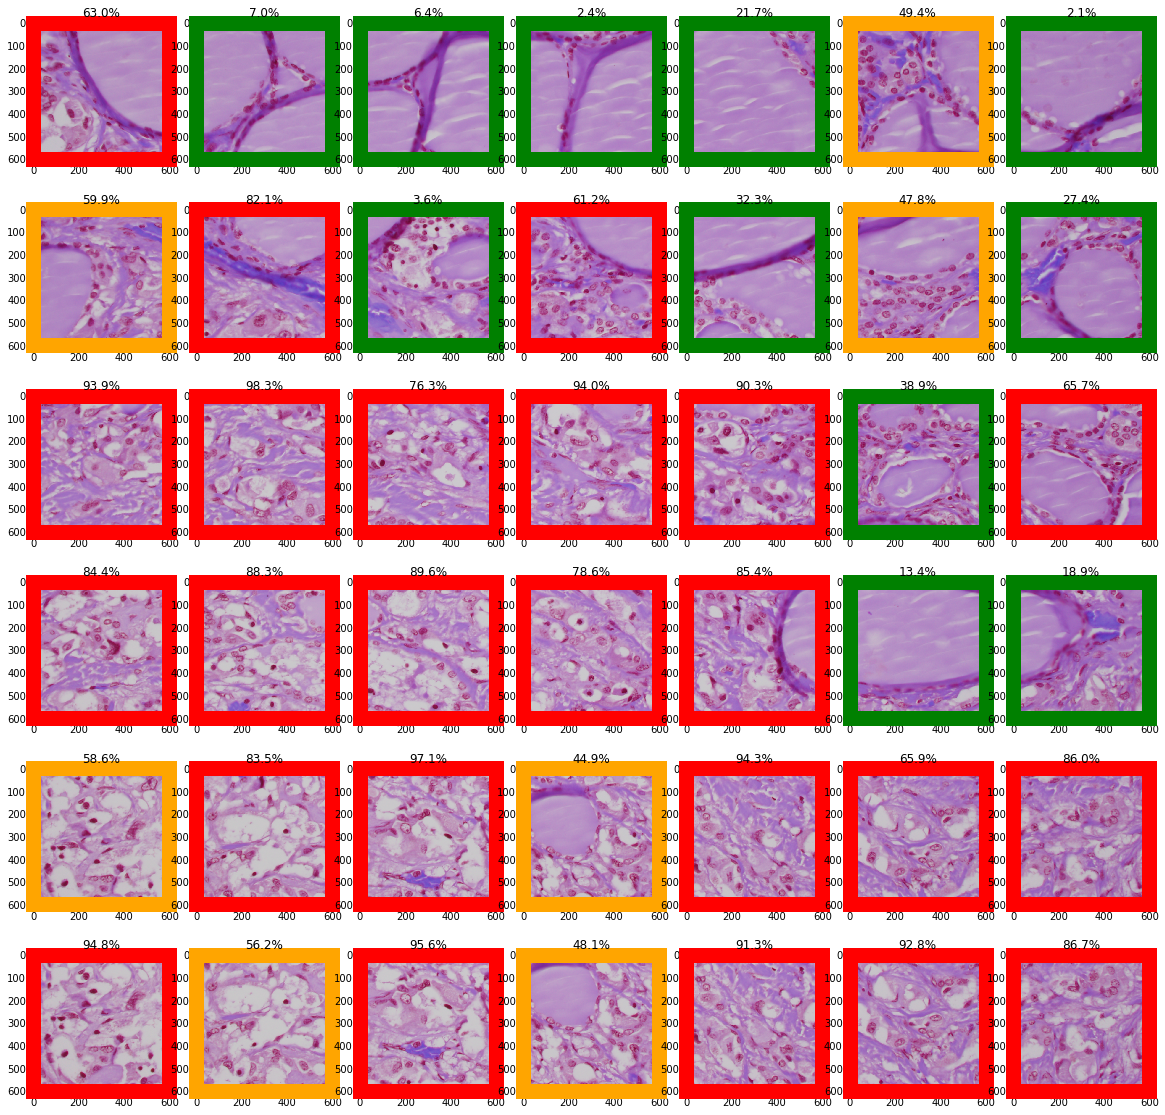

In [147]:
#Load image
image_path = r"C:\Users\lancernik\1GitProjects\Chunker\data\cmuj\thyrMC.tif"
images_list,place_list = cropper(image_path,crop_dim=(600,600))


#Make predictions
pred = []
for i in range(0,len(images_list)):
    
    image = cv2.resize(images_list[i], (96,96))
    #image = image.resize((96, 96), Image.ANTIALIAS)
    image = preprocess_input(image)
    image = image.reshape(1,96,96,3)
    pred.append(model.predict(image).item((0,0)))
    




#Create plot
plot_rows = place_list[-1][0]+1
plot_columns = place_list[-1][1]
PlotCount = plot_rows*plot_columns
print(plot_rows,plot_columns,PlotCount)


plt.figure(figsize=(20,20))
for i in range(1, PlotCount+1):
    if pred1[i-1]<0.4:
        plt.rc('axes',edgecolor='g', lw=15)
    elif pred1[i-1]<0.6:
        plt.rc('axes',edgecolor='orange', lw=15)
    else:
        plt.rc('axes',edgecolor='r', lw=15)
    #plt.tick_params(axis='x', colors='red', which='both')
    plt.subplot(plot_rows, plot_columns, i).set_title('{}%'.format(round(pred[i-1]*100,1)))
    plt.imshow(images_list[i-1])
    